# **Classification exercises with TensorFlow**

## **Importing all possible libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

2024-08-02 16:16:15.621709: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 16:16:15.814956: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-02 16:16:15.904554: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-02 16:16:15.905219: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-02 16:16:16.054035: I tensorflow/core/platform/cpu_feature_gua

## **Scikit's make_moons()**

In [2]:
X, y = make_moons(n_samples = 2000, random_state = 42)

In [3]:
moons = pd.DataFrame({
    'X1': X[ :, 0],
    'X2': X[ :, 1],
    'label': y
})

In [4]:
moons

,X1,X2,label
0,1.905975,0.076669,1
1,0.444579,0.895740,0
2,0.500000,-0.366025,1
3,-0.956626,0.291319,0
4,0.385330,-0.288785,1
...,...,...,...
1995,0.082408,0.102477,1
1996,0.397808,-0.298352,1
1997,-0.905975,0.423331,0
1998,0.872982,-0.491900,1


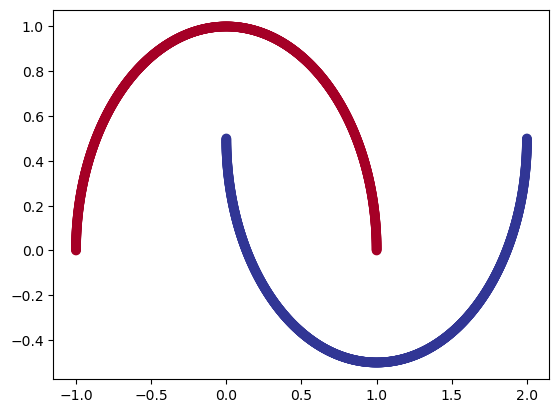

In [5]:
plt.scatter(x = moons.iloc[:, 0], y = moons.iloc[: , 1], c = moons.iloc[: , 2], cmap = 'RdYlBu');

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 2), (500, 2), (1500,), (500,))

## **Create helper functions**

In [8]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x = x_in, verbose = 0)

    # if len(y_pred[0]) > 1:
    if model.output_shape[-1] > 1:
        # print('Multiclassification')
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        # print('Binary classification')
        # y_pred = y_pred.round().reshape(xx.shape)
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [9]:
results = []

## **Create intial model**

In [14]:
tf.keras.utils.set_random_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 4, activation = 'relu'),    
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_1.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_1 = model_1.fit(
    x = X_train,
    y = y_train, 
    epochs = 20,
    validation_split = 0.75
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4657 - loss: 0.6512 - val_accuracy: 0.5031 - val_loss: 0.6170
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4657 - loss: 0.6410 - val_accuracy: 0.4969 - val_loss: 0.6083
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4589 - loss: 0.6311 - val_accuracy: 0.4853 - val_loss: 0.5999
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4508 - loss: 0.6217 - val_accuracy: 0.4729 - val_loss: 0.5917
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4431 - loss: 0.6125 - val_accuracy: 0.4613 - val_loss: 0.5839
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4431 - loss: 0.6036 - val_accuracy: 0.4489 - val_loss: 0.5762
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4278 - loss: 0.5950 - val_accuracy: 0.4400 - val_loss: 0.5688
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4068 - loss: 0.5867 - val_accuracy: 0.4356 - val_los

In [11]:
results.append(model_1.evaluate(x = X_test, y = y_test, verbose = 0))

In [12]:
y_pred_1 = model_1.predict(X_test, verbose = 0)

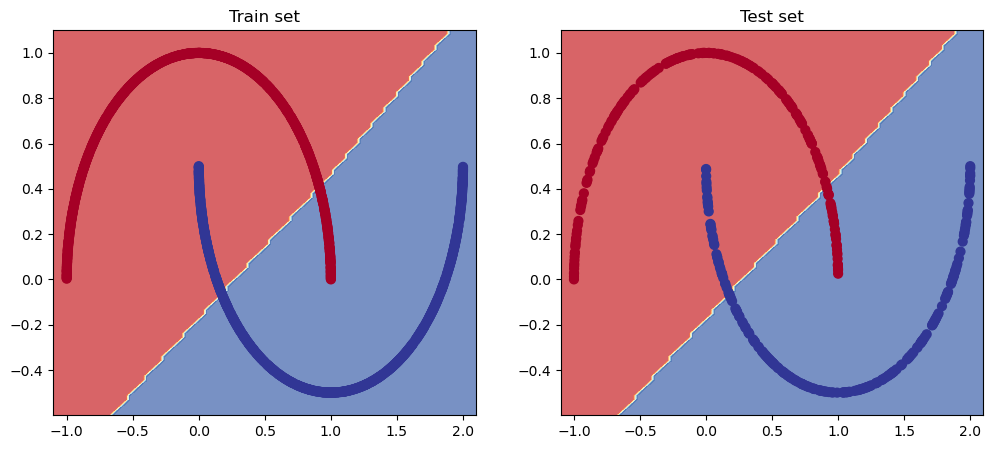

In [13]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_1, X = X_train, y = y_train)
plt.title("Train set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_1, X = X_test, y = y_test)
plt.title("Test set")
plt.show()